In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

     |████████████████████████████████| 5.8MB 23.1MB/s eta 0:00:01     |██████                          | 1.1MB 23.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-

In [4]:
#from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd
import requests
import lxml
from sklearn.cluster import KMeans
from sklearn import metrics
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [5]:
!wget -q -O 'berlin_data.csv' https://raw.githubusercontent.com/zauberware/postal-codes-json-xml-csv/240d643985f3654918665721d47e2642112d81e6/data/DE/zipcodes.de.csv
coordinates_df = pd.read_csv('berlin_data.csv')

In [6]:
coordinates_df = coordinates_df[coordinates_df.state != 'Bayern']
coordinates_df = coordinates_df[coordinates_df.state != 'Bremen']
coordinates_df = coordinates_df[coordinates_df.state != 'Hessen']
coordinates_df = coordinates_df[coordinates_df.state != 'Baden-Württemberg']
coordinates_df = coordinates_df[coordinates_df.state != 'Hamburg']
coordinates_df = coordinates_df[coordinates_df.state != 'Mecklenburg-Vorpommern']
coordinates_df = coordinates_df[coordinates_df.state != 'Niedersachsen']
coordinates_df = coordinates_df[coordinates_df.state != 'Nordrhein-Westfalen']
coordinates_df = coordinates_df[coordinates_df.state != 'Rheinland-Pfalz']
coordinates_df = coordinates_df[coordinates_df.state != 'Schleswig-Holstein']
coordinates_df = coordinates_df[coordinates_df.state != 'Saarland']
coordinates_df = coordinates_df[coordinates_df.state != 'Sachsen-Anhalt']
coordinates_df = coordinates_df[coordinates_df.state != 'Sachsen']
coordinates_df = coordinates_df[coordinates_df.state != 'Thüringen']
coordinates_df = coordinates_df[coordinates_df.state != 'Brandenburg']
coordinates_df.rename(columns={'zipcode': 'Postal code', 'latitude': 'Latitude', 'longitude': 'Longitude'}, inplace=True)
coordinates_df = coordinates_df.drop(['country_code', 'state_code', 'province', 'province_code', 'community', 'community_code', 'state'], axis =1)            

In [7]:
coordinates_df.head()

,Postal code,place,Latitude,Longitude
1287,10115,Berlin,52.5323,13.3846
1288,10117,Berlin,52.5170,13.3872
1289,10119,Berlin,52.5305,13.4053
1290,10178,Berlin,52.5213,13.4096
1291,10179,Berlin,52.5122,13.4164


In [8]:
map_berlin = folium.Map(location=[52.5323, 13.3846], zoom_start=11)
for lat, lng, label in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Postal code']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)

In [9]:
CLIENT_ID = 'JABYZYQHJAAA1VYXYMDSTJRVRAVRXP0K51YH41BV2JBY5EBO' # your Foursquare ID
CLIENT_SECRET = 'NUHB32I5UVYXUZG2EA5YVWMNKX1YLNYVDNSE0VQPZGRVF0YU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50
radius = 2000

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal code', 
                  'Postal code Latitude', 
                  'Postal code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
berlin_venues = getNearbyVenues(names=coordinates_df['Postal code'],
                                   latitudes=coordinates_df['Latitude'],
                                   longitudes=coordinates_df['Longitude']
                                  )

10115
10117
10119
10178
10179
10243
10245
10247
10249
10315
10317
10318
10319
10365
10367
10369
10405
10407
10409
10435
10437
10439
10551
10553
10555
10557
10559
10585
10587
10589
10623
10625
10627
10629
10707
10709
10711
10713
10715
10717
10719
10777
10779
10781
10783
10785
10787
10789
10823
10825
10827
10829
10961
10963
10965
10967
10969
10997
10999
11011
12043
12045
12047
12049
12051
12053
12055
12057
12059
12099
12101
12103
12105
12107
12109
12157
12159
12161
12163
12165
12167
12169
12203
12205
12207
12209
12247
12249
12277
12279
12305
12307
12309
12347
12349
12351
12353
12355
12357
12359
12435
12437
12439
12459
12487
12489
12524
12526
12527
12529
12555
12557
12559
12587
12589
12619
12621
12623
12627
12629
12679
12681
12683
12685
12687
12689
13047
13051
13053
13055
13057
13059
13086
13088
13089
13125
13127
13129
13156
13158
13159
13187
13189
13347
13349
13351
13353
13355
13357
13359
13403
13405
13407
13409
13435
13437
13439
13465
13467
13469
13503
13505
13507
13509
13581
13583
1358

In [12]:
berlin_venues.to_csv("berlin_venues.csv",index=False, encoding='utf8')

In [13]:
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="") # one hot encoding

berlin_onehot['Postal code'] = berlin_venues['Postal code'] # add Postal code column back to dataframe

fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1]) # move Postal code column to the first column
berlin_onehot = berlin_onehot[fixed_columns]

berlin_grouped = berlin_onehot.groupby('Postal code').mean().reset_index() # group rows by Postal code and by taking the mean of the frequency of occurrence of each category

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
# print each Postal code along with the top 5 most common venues
num_top_venues = 50

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Postal_code_venues_sorted = pd.DataFrame(columns=columns)
Postal_code_venues_sorted['Postal code'] = berlin_grouped['Postal code']

for ind in np.arange(berlin_grouped.shape[0]):
    Postal_code_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

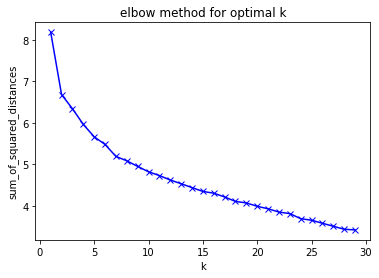

In [16]:
# using an elbow plot to see at what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest.
sum_of_squared_distances = []
K = range(1,30)
berlin_grouped_clustering = berlin_grouped.drop('Postal code', 1)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(berlin_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [17]:
# Cluster the Postal codes

# set number of clusters
kclusters = 23

berlin_grouped_clustering = berlin_grouped.drop('Postal code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 9, 21,  9,  9,  9,  9,  9, 17, 17, 10], dtype=int32)

In [18]:
Postal_code_venues_sorted.head()

,Postal code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue
0,10115,Coffee Shop,Hotel,Organic Grocery,Cocktail Bar,Café,Pastry Shop,Bookstore,Vegetarian / Vegan Restaurant,Restaurant,...,Fabric Shop,Fish Market,Flea Market,Farm,Field,Fast Food Restaurant,Empanada Restaurant,Event Space,Doner Restaurant,Dim Sum Restaurant
1,10117,History Museum,Plaza,Bookstore,Hotel,Concert Hall,Drugstore,Gourmet Shop,Chocolate Shop,Historic Site,...,Field,Dance Studio,Fish & Chips Shop,Fish Market,Fair,Fabric Shop,Diner,Eastern European Restaurant,Discount Store,Event Space
2,10119,Coffee Shop,Italian Restaurant,Bookstore,Bar,Ice Cream Shop,Vegetarian / Vegan Restaurant,Bakery,Cocktail Bar,Theater,...,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fabric Shop,Electronics Store,Doner Restaurant,Department Store
3,10178,Coffee Shop,History Museum,Plaza,Indie Movie Theater,Café,Italian Restaurant,Bistro,Park,Bookstore,...,Farmers Market,Ethiopian Restaurant,Hot Dog Joint,Hotel,Fast Food Restaurant,Hotel Bar,IT Services,Fair,Hostel,Fabric Shop
4,10179,Coffee Shop,Hotel,Café,General Entertainment,Garden,Italian Restaurant,Art Gallery,Indie Movie Theater,Organic Grocery,...,Dive Bar,Discount Store,Distillery,Fish Market,Fast Food Restaurant,Diner,Dim Sum Restaurant,Field,Electronics Store,Farmers Market


In [19]:
#  create a new dataframe that includes the cluster as well as the top 10 venues for each Postal code

# add clustering labels
Postal_code_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

berlin_merged = coordinates_df

# merge berlin_grouped with berlin_data to add latitude/longitude for each Postal code
berlin_merged = berlin_merged.join(Postal_code_venues_sorted.set_index('Postal code'), on='Postal code')
berlin_merged = berlin_merged.dropna()
berlin_merged = berlin_merged.astype({'ClusterLabels': int})

berlin_merged.head() # check the last columns!

,Postal code,place,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue
1287,10115,Berlin,52.5323,13.3846,9,Coffee Shop,Hotel,Organic Grocery,Cocktail Bar,Café,...,Fabric Shop,Fish Market,Flea Market,Farm,Field,Fast Food Restaurant,Empanada Restaurant,Event Space,Doner Restaurant,Dim Sum Restaurant
1288,10117,Berlin,52.5170,13.3872,21,History Museum,Plaza,Bookstore,Hotel,Concert Hall,...,Field,Dance Studio,Fish & Chips Shop,Fish Market,Fair,Fabric Shop,Diner,Eastern European Restaurant,Discount Store,Event Space
1289,10119,Berlin,52.5305,13.4053,9,Coffee Shop,Italian Restaurant,Bookstore,Bar,Ice Cream Shop,...,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fabric Shop,Electronics Store,Doner Restaurant,Department Store
1290,10178,Berlin,52.5213,13.4096,9,Coffee Shop,History Museum,Plaza,Indie Movie Theater,Café,...,Farmers Market,Ethiopian Restaurant,Hot Dog Joint,Hotel,Fast Food Restaurant,Hotel Bar,IT Services,Fair,Hostel,Fabric Shop
1291,10179,Berlin,52.5122,13.4164,9,Coffee Shop,Hotel,Café,General Entertainment,Garden,...,Dive Bar,Discount Store,Distillery,Fish Market,Fast Food Restaurant,Diner,Dim Sum Restaurant,Field,Electronics Store,Farmers Market


In [20]:
# create map
map_clusters = folium.Map(location=[52.5323, 13.3846], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Postal code'], berlin_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [21]:
berlin_merged.to_csv("output_filename.csv", index=False, encoding='utf8')